<img style="width:100%; height:auto;" src="https://commun.it/blog/wp-content/uploads/2019/06/twitter-channels-1200x500.jpg">
<img style="width:70px; height:70px; float:left;" src="https://cliply.co/wp-content/uploads/2021/09/CLIPLY_372109260_TWITTER_LOGO_400.gif"><img style="width:70px; height:70px; float:right;" src="https://cliply.co/wp-content/uploads/2021/09/CLIPLY_372109260_TWITTER_LOGO_400.gif"><h1 style="background-color:white; color:blue; text-align:center;"><b>Hate Speech Detection- Machine Learning Approach </b>

In [4]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [5]:
train=pd.read_csv("C:/Users/user/Desktop/diss data/train.csv")
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
test=pd.read_csv("C:/Users/user/Desktop/diss data/test.csv")
test.head()
len(test)

17197

In [7]:
Htweet = train[train.label == 1]
Htweet.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [8]:
NonHtweet=train[train.label == 0]
NonHtweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Cleaning and Preprocessing 

In [10]:
import re
from sklearn.utils import resample
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
import re
from sklearn.utils import resample

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df


In [13]:
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [14]:
test['clean_test_tweets'] = test['tweet'].apply(clean_tweet)
test.head()

NameError: name 'clean_tweet' is not defined

OVERFITTING AND OVERSAMPLING 

In [15]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [16]:
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    

In [17]:
plt.show()

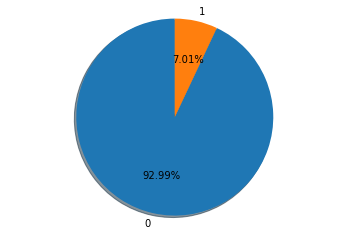

In [18]:
createPieChartFor(train.label)

In [19]:
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [20]:
trainmaj = train_clean[train_clean.label==0]
trainmin = train_clean[train_clean.label==1]
train_minority_upsampled = resample(trainmin, 
                                 replace=True,    
                                 n_samples=len(trainmaj),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, trainmaj])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

In [21]:
import sys
print(sys.executable)


C:\Users\user\anaconda3\python.exe


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


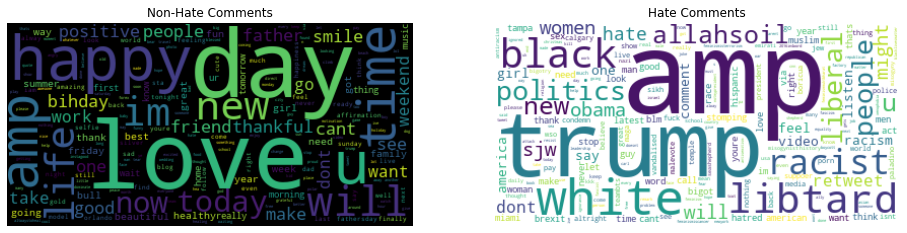

In [23]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][train.label == 0])
text_neg = " ".join(train_clean['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'black').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

--------------After Upsampling the Minority Class---------------


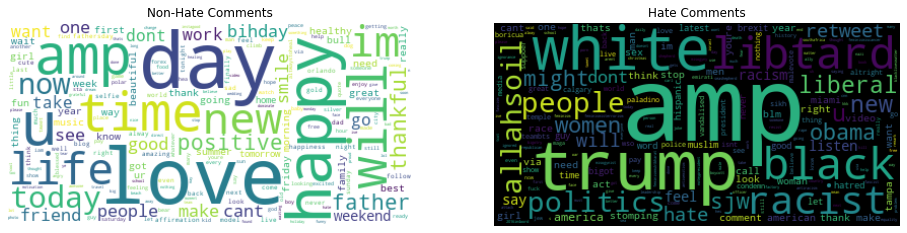

In [24]:
from wordcloud import WordCloud

print('--------------After Upsampling the Minority Class---------------')

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][train.label == 0])
text_neg = " ".join(train_upsampled['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [25]:
import xgboost as xgb
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score


In [26]:
pipeline_xgb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', xgb.XGBClassifier(use_label =False)),])


In [27]:
x_train, x_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)



In [28]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [29]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [30]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(44580, 34641)
(44580, 34641)


In [31]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=500)

In [33]:
predictions = model.predict(x_test_tfidf)

In [36]:
from sklearn.linear_model import LogisticRegression

In [42]:
logreg = LogisticRegression()

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,classification_report, precision_recall_curve
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[7291  199]
 [   2 7368]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7490
           1       0.97      1.00      0.99      7370

    accuracy                           0.99     14860
   macro avg       0.99      0.99      0.99     14860
weighted avg       0.99      0.99      0.99     14860



In [52]:
model = pipeline_xgb.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('--'* 20)
print('F1_Score: ',f1_score(y_test, y_predict))
print('Accuracy_Score: ', accuracy_score(y_test, y_predict))
print('--'*20)
print('---RepeatedKFOLD---')
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state =1)
score2 = cross_val_score(pipeline_xgb, x_train, y_train, cv=cv, scoring='f1_micro', n_jobs=1)
score2 = np.mean(score2)
print('--'* 20)
print('RKFold_Score: ', score2)
print('--'* 20)

[00:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "use_label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


----------------------------------------
F1_Score:  0.9159862338889263
Accuracy_Score:  0.9162180349932705
----------------------------------------
---RepeatedKFOLD---
[00:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "use_label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('--- Axis1 = ref_val, Axis0 = pred_val ---')

x_val, y_val = x_test, y_test

yhat = model.predict_proba(x_val)
ypred = model.predict(x_val)
print('Confusion_Matrix: ')
print(confusion_matrix(y_val, ypred, labels = [1,0]).T)
print('Precsion_Score: ', precision_score(y_val, ypred, labels = [1,0]))
print('Recall_Score: ', recall_score(y_val, ypred, labels = [1,0]))

print('y_hat_shape: ',yhat.shape)
yhat = yhat[:,1]


--- Axis1 = ref_val, Axis0 = pred_val ---
Confusion_Matrix: 
[[6787  662]
 [ 583 6828]]
Precsion_Score:  0.9111290106054504
Recall_Score:  0.9208955223880597
y_hat_shape:  (14860, 2)


In [54]:
ns_probs = [0 for _ in range(len(y_val))]
ns_auc = roc_auc_score(y_val, ns_probs, labels = [1,0])
lr_auc = roc_auc_score(y_val, yhat, labels = [1,0])
print()
print('random_classifier: ROC AUC=%.3f' % (ns_auc))
print('XGBclassifier: ROC AUC=%.3f' % (lr_auc))


random_classifier: ROC AUC=0.500
XGBclassifier: ROC AUC=0.976


In [55]:
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, yhat)

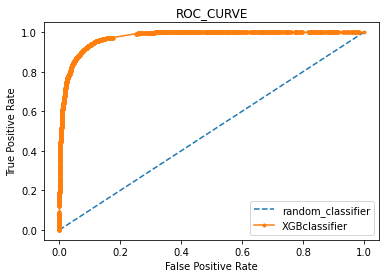

In [56]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='random_classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBclassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC_CURVE')
plt.show()

auc-score:  0.9733875328219912
f1-score:  0.9159862338889263


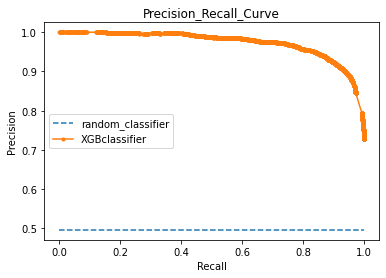

In [57]:
lr_precision, lr_recall, _ = precision_recall_curve(y_val, yhat)
print('auc-score: ',auc(lr_recall, lr_precision))
print('f1-score: ', f1_score(y_val, ypred, labels = [1,0]))
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='random_classifier')
plt.plot(lr_recall, lr_precision, marker='.', label='XGBclassifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision_Recall_Curve')
plt.show()

In [67]:
def predict(inp):
    inp = pd.Series(inp)
    yhat = ((np.ravel(model.predict(inp)).tolist()))
    if yhat[-1] == 1:
        print('Conc : Hate_Comment_Detected_😔')
    if yhat[-1] == 0:
        print('Conc: Not_a_hate_comment_😄')
        
inp = ['Son of a cunt', 'I love playing soccer ']
for i in inp:
    print('Entered_Comment: ', i)
    predict(i)
    print('--'*30)

Entered_Comment:  Son of a cunt
Conc : Hate_Comment_Detected_😔
------------------------------------------------------------
Entered_Comment:  I love playing soccer 
Conc: Not_a_hate_comment_😄
------------------------------------------------------------
